In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('BlackFriday.csv')

del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution By Age'}, xlabel='Age'>

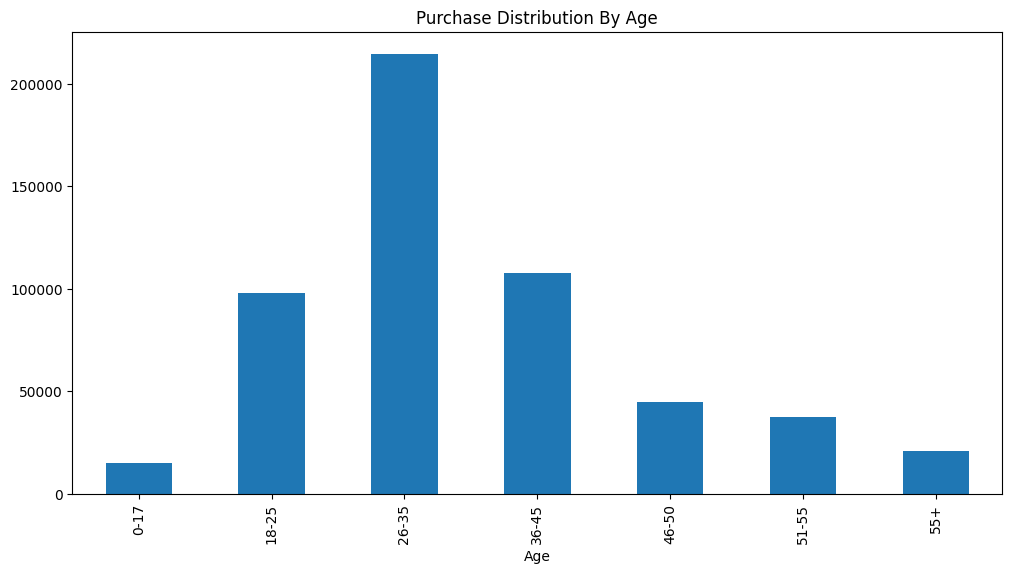

In [13]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12,6), title = "Purchase Distribution By Age")

## Navie Approach

In [15]:
for i in df['Age'].unique():
    print(i)

0-17
55+
26-35
46-50
51-55
36-45
18-25


In [16]:
df['Age'] == '0-17'

0          True
1          True
2          True
3          True
4         False
          ...  
537572    False
537573    False
537574    False
537575    False
537576    False
Name: Age, Length: 537577, dtype: bool

In [17]:
df[df['Age'] == '0-17']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,7746
...,...,...,...,...,...,...,...,...,...,...
537280,1004690,P00242742,F,0-17,10,C,3,0,1,11561
537281,1004690,P00226442,F,0-17,10,C,3,0,11,6010
537282,1004690,P00181442,F,0-17,10,C,3,0,11,7458
537283,1004690,P00192042,F,0-17,10,C,3,0,5,3706


In [18]:
len(df[df['Age'] == '0-17'])

14707

In [19]:
len(df[df['Age'] == '18-25'])

97634

In [20]:
for i in df["Age"].unique():
    print(i,":", len(df[df['Age'] == i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [24]:
df[df['Age'] == i]['Product_ID']

70        P00366542
71        P00190742
72        P00151842
73        P00112642
74        P00118442
            ...    
537566    P00048742
537567    P00157542
537568    P00250642
537569    P00023142
537570    P00162442
Name: Product_ID, Length: 97634, dtype: object

In [25]:
i

'18-25'

In [26]:
df[df['Age'] == i]['Product_ID'].nunique()

3213

In [27]:
i

'18-25'

In [29]:
# People Buying From Unique Product With Age Group
for i in df["Age"].unique():
    print(i,":", df[df['Age'] == i]['Product_ID'].nunique())

0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


In [34]:
# COnverting To List To Plot The Graph
lst = []
for i in df["Age"].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])

data = pd.DataFrame(lst, columns = ['Age', 'Products'])

In [35]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

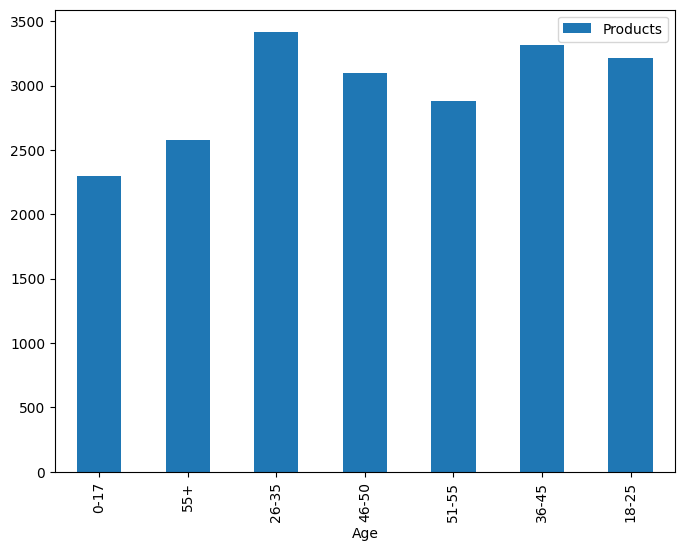

In [37]:
data.plot.bar(x = 'Age', figsize = (8,6))

In [38]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: title={'center': 'Amount Spend By Age'}, xlabel='Age'>

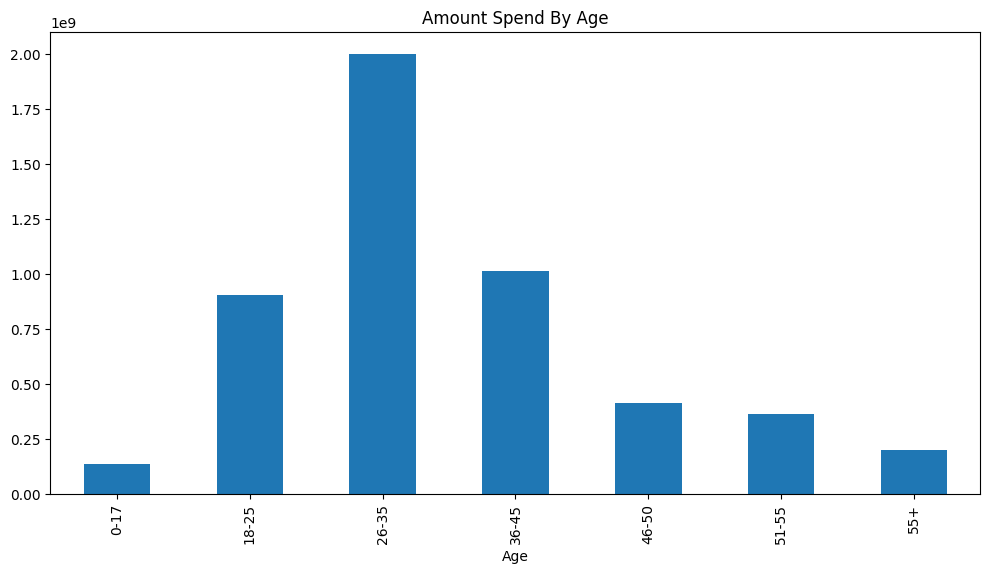

In [40]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12,6), title = 'Amount Spend By Age')

<Axes: title={'center': 'Amount Spend By Age'}, xlabel='Age'>

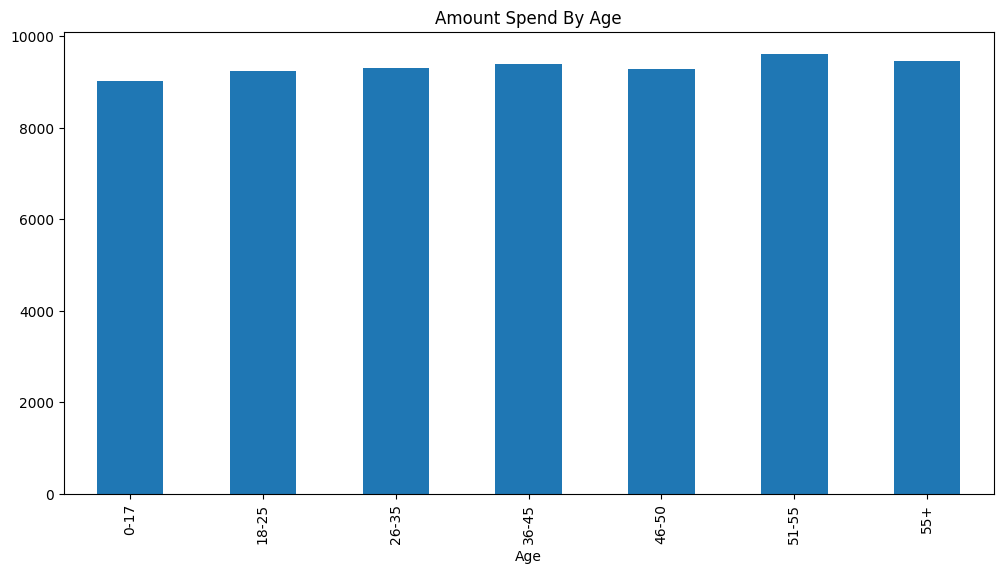

In [41]:
# Average Price Paid By Each Age Group
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind = 'bar', figsize = (12,6), title = 'Amount Spend By Age')

In [42]:
# Average Price Paid By Each Age Group
df.groupby('Age').mean(numeric_only=True)['Purchase']

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<Axes: ylabel='Purchase'>

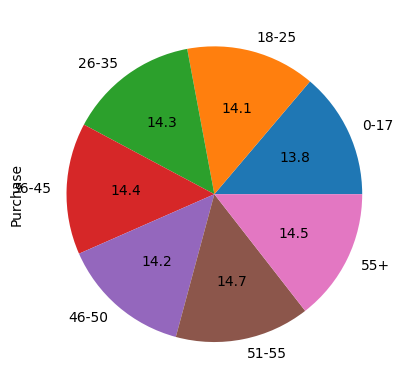

In [44]:
# Average Price Paid By Each Age Group
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

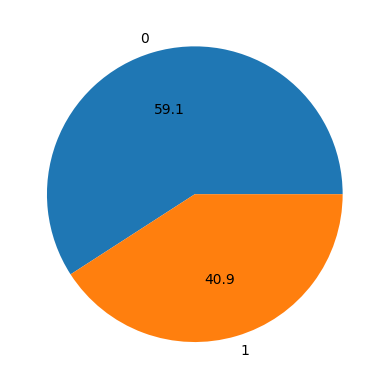

In [45]:
# Marital_Status 
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

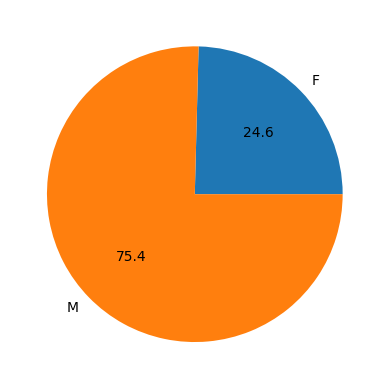

In [46]:
# Gender
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.1f')